# K-means clustering algorithm
#### by Elizabeth Barnes

Demonstration of how the k-means clustering algorithm works.

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq
import random

#.............................................
# PLOTTING COMMANDS
#.............................................
import matplotlib as mpl

linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100
#mpl.rcParams['xtick.labelsize'] = fig_text_default

COLOR_MAT = ['red','limegreen','blue','cornflowerblue','red','orange','navy','hotpink','grey']
MS = 10
fig_scale = 0.25

### Setup the code
This notebook shows you step-by-step how k-means works. Thus, I found some code online that allowed me to output the steps at different points (rather than the final answer). See below.

In [2]:
# Define functions
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

def find_centers(X, K):
    if isinstance(K, list):
        oldmu = K
        mu = K
    else:
        print('getting random centers')
        # Initialize to K random centers
        oldmu = random.sample(X, K)
        mu = random.sample(X, K)
    for i in range(0,1):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X
    
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([random.gauss(c[0], s), random.gauss(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X 

### Define your data
Here I am just making up a bunch of points to use. (I got these from an [example on wikipedia](https://en.wikipedia.org/wiki/K-means_clustering) and just generall eye-balled the coordinates.) I am choosing k=3, which means I will be looking to divide my data into 3 clusters. I also need to provide an initial guess for the three cluster centers.

In [3]:
X = np.array([[0,3],[0,2],[0,1],[2,-1],[1.9,-2],[3,-3],[4,-3],[5.1,-2],[5,-1],[7,1],[7,1.5],[7,3.5]])
initial_guess = [ [2,5],[2,0],[6.5,0] ]

### Plot the resulting steps for k-means clustering
Below I create the plot of the initial data and my initial guess for the clusters.

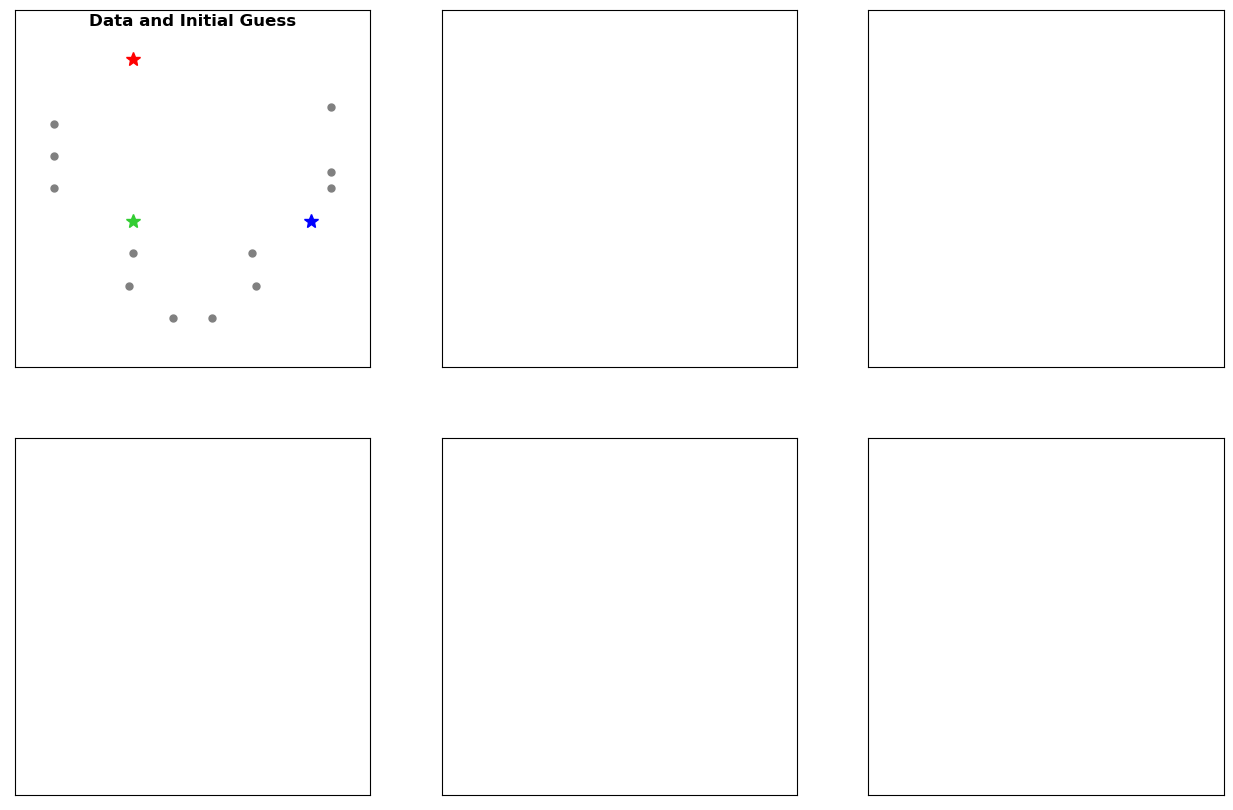

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12*1.3,8*1.3))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax = [ax0,ax1,ax2,ax3,ax4,ax5]

ax0.plot(X[:,0],X[:,1],'.', markeredgecolor = 'gray', color = 'gray', markersize = MS)

for (ind,val) in enumerate(initial_guess):
    ax0.plot(val[0],val[1],'*', color = COLOR_MAT[ind],markersize = MS, markeredgecolor = COLOR_MAT[ind])
    
plt.xlim(-1.,8.0)
plt.ylim(-4.5,6.5) 
yvals = plt.ylim()
xvals = plt.xlim()

ax0.text(xvals[0]+(xvals[1]-xvals[0])/2.,yvals[1]*.98,'Data and Initial Guess', fontsize = 12, fontweight='bold', 
         horizontalalignment = 'center', verticalalignment='top')

for axind in np.arange(0,len(ax)):
    ax[axind].set_xticks([])
    ax[axind].set_yticks([])   
    ax[axind].set_xlim(xvals)
    ax[axind].set_ylim(yvals)

Next, we loop through iterations and show how k-means updates the centers of the clusters.

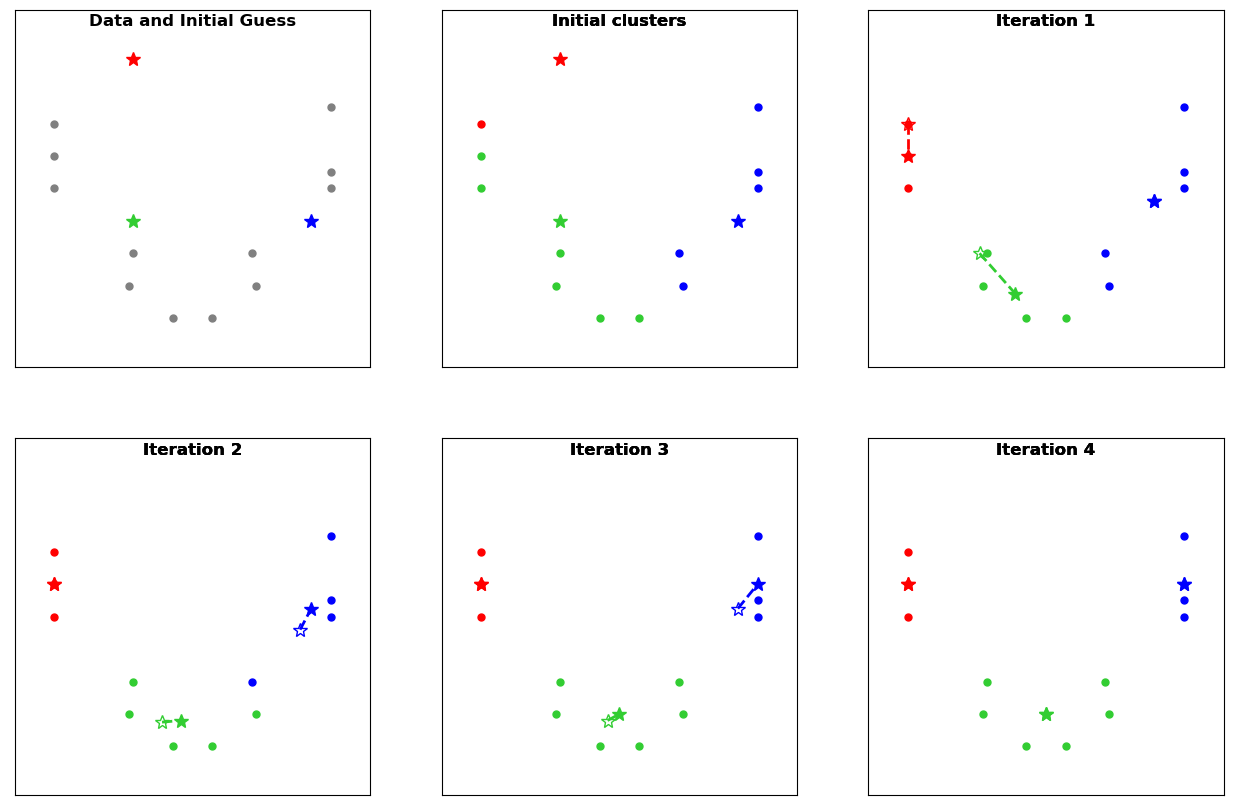

In [5]:
for j in range(0,5):
    if j==0:
        old_centers = initial_guess
        centers, idx = find_centers(X,initial_guess)
    else:
        old_centers = centers
        centers, idx = find_centers(X,old_centers)
       
    for (ind,val) in enumerate(centers):
        x = [item[0] for item in idx[ind]]
        y = [item[1] for item in idx[ind]]
        
        if(j != 0):
            ax[j+1].text(xvals[0]+(xvals[1]-xvals[0])/2.,yvals[1]*.98,'Iteration ' + str(j), fontsize = 12, 
                     fontweight='bold', horizontalalignment = 'center', verticalalignment='top')

            ax[j+1].plot(x,y,'.',markeredgecolor = COLOR_MAT[ind], color = COLOR_MAT[ind], markersize = MS)
            ax[j+1].plot(val[0],val[1],'*', color = COLOR_MAT[ind],markersize = MS, markeredgecolor = COLOR_MAT[ind])
            #ax = plt.axes()
            ax[j+1].plot(old_centers[ind][0],old_centers[ind][1],'*',markeredgecolor = COLOR_MAT[ind],markersize = MS, 
                     color = 'none')
            ax[j+1].plot([old_centers[ind][0], val[0]], [old_centers[ind][1], val[1]], '--', color = COLOR_MAT[ind])
        else:
            ax[j+1].text(xvals[0]+(xvals[1]-xvals[0])/2.,yvals[1]*.98,'Initial clusters', fontsize = 12, 
                     fontweight='bold', horizontalalignment = 'center', verticalalignment='top')
            ax[j+1].plot(x,y,'.',markeredgecolor = COLOR_MAT[ind], color = COLOR_MAT[ind], markersize = MS)
            ax[j+1].plot(old_centers[ind][0],old_centers[ind][1],'*', color = COLOR_MAT[ind],markersize = MS, 
                     markeredgecolor = COLOR_MAT[ind])
            

        ax[j+1].set_xticks([])
        ax[j+1].set_yticks([])   
        ax[j+1].set_xlim(xvals)
        ax[j+1].set_ylim(yvals)
    
fig

In the figure, the three colored stars denote the three centers of our clusters. Other than in the initial step, the points are colored based on which cluster center they are closest to. Dashed lines denote the movement of the cluster centers from one iteration to the next.

After 4 iterations, the centers (stars) stop updating, and so, the algorithm has converged to a solution.